### Table of Contents

1. [Dataset Description](#titanic)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Feature Engineering](#fe)
5. [Decision Tree](#dt)
     - 5.1 [Training Decision Tree Model](#tdt)
     - 5.2 [Predictions from Decision Tree Model](#pdt)
     - 5.3 [Evaluating the Decision Tree Model](#edt)
     - 5.4 [Parameter Tuning](#ptdt)
6. [Random Forest](#rf)
     - 6.1 [Training Random Forest Model](#trf)
     - 6.2 [Predictions from Random Forest Model](#prf)
     - 6.3 [Evaluating the Random Forest Model](#erf)
7. [Appendix](#appendix)

## Titanic Dataset  

### 1. Dataset Description  <a id='titanic'>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

** Problem Statement ** : We have been provided records of 891 passengers aboard titanic along with information about their age, gender, ticket, fare...etc. 

** Objective **
In this contest, we will to apply the tools of machine learning to predict which passengers survived the tragedy.

**Column Descriptions**
- PassengerId: type should be integers
- Survived: Survived or Not
- Pclass: Class of Travel
- Name: Name of Passenger
- Sex: Gender
- Age
- SibSp: Number of Sibling/Spouse abord
- ParchNumber of Parent/Child abord
- Ticket
- Fare
- Cabin
- Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the train and test datasets
train_df = pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\DT and RF\Titanic\attachment_titanic_lyst9961.csv")
test_df = pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\DT and RF\Titanic\attachment_titanic_test_lyst5135.csv")

### 3. Exploring the dataset  <a id='explore'>

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are missing values in few of the columns of the dataset such as Age and Cabin <br>
There are 891 rows and 12 columns

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing values in few of the columns of the dataset such as Age,Fare and Cabin <br>
There are 418 rows and 11 columns

** Descriptive Statistics**

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is a lot of difference in standard deviations. We would need to scale the features. But Tree models do not need feature scaling

In [8]:
#Checking for correlation between the features
corr = train_df.corr()
print(corr.round(2))

             PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId         1.00     -0.01   -0.04  0.04  -0.06  -0.00  0.01
Survived           -0.01      1.00   -0.34 -0.08  -0.04   0.08  0.26
Pclass             -0.04     -0.34    1.00 -0.37   0.08   0.02 -0.55
Age                 0.04     -0.08   -0.37  1.00  -0.31  -0.19  0.10
SibSp              -0.06     -0.04    0.08 -0.31   1.00   0.41  0.16
Parch              -0.00      0.08    0.02 -0.19   0.41   1.00  0.22
Fare                0.01      0.26   -0.55  0.10   0.16   0.22  1.00


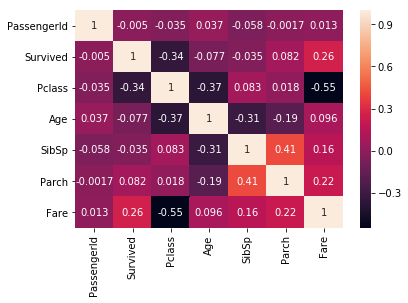

In [9]:
#PLotting the correlation using heatmap
sns.heatmap(corr,annot=True);

There's no correrlation between any 2 variables

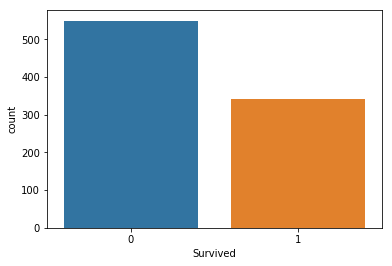

In [10]:
#Let's check the count of people survived during the accient
sns.countplot(x='Survived', data=train_df);

Text(0.5, 0, 'Gender')

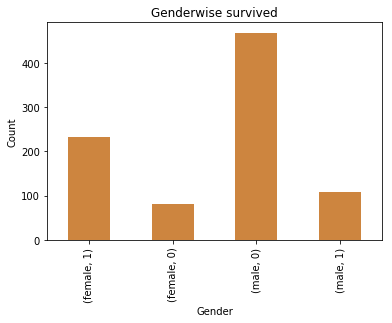

In [11]:
#Let's check how many males and females survived 
train_df.groupby('Sex')['Survived'].value_counts().plot(kind='bar',color = 'peru')
plt.title("Genderwise survived")
plt.ylabel('Count')
plt.xlabel('Gender')

The above plot helps in understanding the no. of males and females survived and not survived

In [12]:
#Let's plot a pivot table to know the no. of males and females survived 
table = pd.pivot_table(train_df,values="Survived",index="Sex",aggfunc=np.count_nonzero)
table

,Survived
Sex,
female,233
male,109


### 4. Feature Engineering  <a id='fe'>

In [13]:
# Replacing the Sex as 1's and 0's
train_df.Sex.replace({"male":1,"female":0},inplace=True)
train_df.Sex = train_df.Sex.astype('category')

In [14]:
# Separating the features and labels

y = train_df["Survived"].values

columns = ["Pclass", "Sex", "Age", "SibSp"] 
features = train_df[list(columns)].values
features

array([[3, 1, 22.0, 1],
       [1, 0, 38.0, 1],
       [3, 0, 26.0, 0],
       ...,
       [3, 0, nan, 1],
       [1, 1, 26.0, 0],
       [3, 1, 32.0, 0]], dtype=object)

In [15]:
# Filling the missing values with the mean of the columns

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_variable = imp.fit_transform(features)
X_variable

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.        ,  1.        , 22.        ,  1.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ],
       [ 1.        ,  1.        , 26.        ,  0.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ]])

### 5. Decision Tree  <a id='dt'>

In [16]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
dtree1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dtree1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

This shows all the hyperparameters of Decision Tree model

### 5.1 Training Decision Tree Model  <a id='tdt'>

In [17]:
# Fit the decision tree model on your features and label

dtree1 = dtree1.fit(X_variable, y)

In [18]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(columns,dtree1.feature_importances_))

[('Pclass', 0.26627379767117476),
 ('Sex', 0.609111929496237),
 ('Age', 0.12461427283258814),
 ('SibSp', 0.0)]

In [19]:
# The accuracy of the model

print(dtree1.score(X_variable, y))

0.8069584736251403


### 5.2 Predictions from Decision Tree Model   <a id='pdt'>

In [20]:
#This is the test dataset where we are going to predict who will survive.

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#Feature engg.
test_df.Sex.replace({"male":1,"female":0},inplace=True)
test_df.Sex = train_df.Sex.astype('category')

In [22]:
# Filling missing values in test data 

features_test = test_df[list(columns)].values
imp_test = Imputer(missing_values='NaN', strategy='mean', axis=0)
x_test = imp_test.fit_transform(features_test)
x_test

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.        ,  1.        , 34.5       ,  0.        ],
       [ 3.        ,  0.        , 47.        ,  1.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  1.        ]])

In [23]:
# Predictions from Decision Tree Model

y_pred = dtree1.predict(x_test)

### 5.3 Evaluating the Decision Tree Model  <a id='edt'>

In [24]:
#Print Confusion matrix on Train Data
from sklearn import metrics

pred = dtree1.predict(X_variable)
cf_dt = metrics.confusion_matrix(y, pred)
cf_dt 

array([[467,  82],
       [ 90, 252]], dtype=int64)

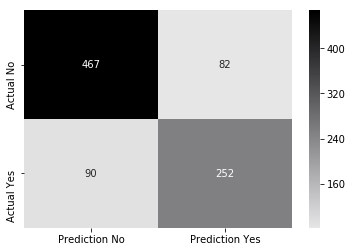

In [25]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_dt,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 5.4 Parameter Tuning   <a id='ptdt'>

In [26]:
# Setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two

max_depth = 10
min_samples_split = 5
dtree2 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 42)
dtree2 = dtree2.fit(X_variable, y)

#Print the score of both the decision tree

print("New Decision Tree Accuracy: ",dtree2.score(X_variable, y))
print("Original Decision Tree Accuracy",dtree1.score(X_variable,y))

New Decision Tree Accuracy:  0.8720538720538721
Original Decision Tree Accuracy 0.8069584736251403


We have improved our model by fine tuning the parameters. This is called hyperparameters tuning

In [27]:
# Making predictions on our Train Data 

pred = dtree2.predict(X_variable)

In [28]:
# Building confusion matrix of our improved model

df_confusion_new = metrics.confusion_matrix(y, pred)
df_confusion_new

array([[511,  38],
       [ 76, 266]], dtype=int64)

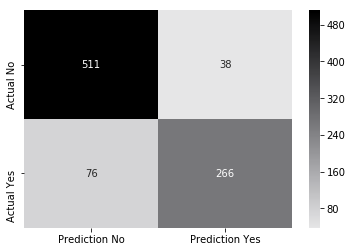

In [29]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_new, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 6. Random Forest  <a id='rf'>

In [30]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

### 6.1 Training Random Forest Model  <a id='trf'>

In [31]:
# Fitting the model on Train Data

my_forest = rf.fit(X_variable, y)

In [32]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(X_variable, y))

0.9012345679012346


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

In [33]:
# Making predictions

pred = my_forest.predict(X_variable)

### 6.3 Evaluating the Random Forest Model   <a id='erf'>

In [34]:
df_confusion_rf = metrics.confusion_matrix(y, pred)
df_confusion_rf

array([[518,  31],
       [ 57, 285]], dtype=int64)

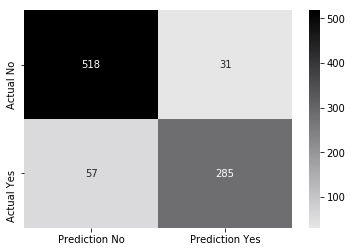

In [35]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 7. Appendix  <a id = 'appendix'>

** Grid Search **

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion... etc. We will build different models with different combinations of these parameters and come up with the best model. 


In [36]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [37]:
# Importing GridSearch

from sklearn.model_selection import GridSearchCV

In [38]:
# Building the model

dtree3 = tree.DecisionTreeClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = dtree3, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [39]:
grid.fit(X_variable,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
# Best accuracy score

grid.best_score_

0.8103254769921436

In [41]:
# Best parameters for the model

grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [42]:
# Building the model based on new parameters

dtree3 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, random_state=42)

In [43]:
dtree3.fit(X_variable,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [44]:
# Accuracy Score for new model

dtree3.score(X_variable,y)

0.8832772166105499

**Observation: **Our accuracy score improve from 0.87 to 0.88 

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [45]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [48]:
rf2 = RandomForestClassifier()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [49]:
rf_random.fit(X_variable,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.5s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.5s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.1s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733,

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.2s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.2s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.6s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.6s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, mi

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.4s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.0s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_sampl

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.8s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   1.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.5s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=377

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.4s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.6s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

A Random Forest model built with this hyperparameters will provide best accuracy

In [52]:
rf_random.best_score_

0.8226711560044894

**Observation: ** The original Random forest algorithm gave 0.90 accuracy whereas after Randomized Grid Search we have only got 0.82. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.